# Feature preprocessing

### Importing necessary libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
WELLS_PATH = os.path.join('..', 'data', 'wells_info.csv')
wells = pd.read_csv(WELLS_PATH)
wells

API  PermitDate    SpudDate CompletionDate  \
0    5005072170100  2014-05-06  2014-05-06     2014-12-02   
1    5123377130000  2013-07-21  2013-10-06     2014-02-26   
2    5123379280000  2013-09-08  2013-09-25     2014-09-07   
3    5123379400000  2013-09-11  2014-12-05     2015-03-31   
4    5123385820100  2014-01-07  2014-01-13     2014-04-23   
5    5123390320000  2014-02-27  2014-06-20     2014-10-30   
6    5123390440000  2014-02-28  2014-04-26     2014-08-16   
7    5123392690000  2014-04-14  2015-03-20     2015-08-03   
8    5123399750000  2014-08-09  2014-11-14     2015-04-16   
9    5123402600000  2014-09-22  2015-06-16     2015-09-13   
10   5123409020000  2014-12-23  2015-02-07     2015-09-07   
11   5123410480000  2015-01-21  2015-03-16     2015-04-23   
12  30015414470000  2013-06-07  2013-10-06     2014-01-07   
13  30025425390000  2015-04-30  2015-06-17     2015-10-10   
14  33023010960000  2013-08-22  2014-01-19     2014-04-07   
15  33025026780000  2014-09-30  2015-05-04     2015-09-23   
16  33053048870100  2013-03-21  2014-08-06     2014-11-05   
17  33053051530000  2013-07-29  2013-09-03     2014-04-27   
18  33053056390200  2014-01-23  2014-12-18     2015-01-17   
19  33053056550000  2014-01-28  2014-03-14     2014-06-25   
20  33053059400000  2014-05-15  2014-11-13     2015-04-03   
21  33053061530000  2014-08-05  2015-01-27     2015-06-28   
22  33053061600000  2014-08-05  2014-09-25     2015-01-13   
23  33053061970000  2014-08-15  2015-02-25     2015-08-10   
24  33053062710000  2014-09-15  2014-11-02     2015-04-05   
25  33053067490000  2015-02-23  2015-07-09     2015-10-10   
26  33061032390000  2014-08-05  2014-10-14     2015-02-16   
27  33061033560000  2014-10-16  2015-02-06     2015-07-24   
28  33105031270000  2013-07-16  2013-09-19     2014-02-10   
29  33105032030000  2013-09-09  2013-10-24     2014-04-26   
30  33105034810000  2014-03-24  2014-06-06     2015-01-15   
31  33105035380000  2014-05-23  2014-06-11     2014-12-29   
32  33105035810000  2014-06-19  2014-09-01     2015-05-13   
33  33105036550100  2014-08-04  2014-10-27     2015-02-26   
34  33105037690100  2014-09-22  2014-12-23     2015-05-08   
35  35017246780000  2014-03-19  2014-03-21     2014-05-19   
36  35017246960000  2014-09-03  2014-09-28     2014-12-10   
37  35073250300000  2014-11-26  2015-02-14     2015-08-25   
38  42105419830000  2014-02-27  2014-03-03     2014-06-04   
39  42105420060100  2014-04-10  2014-06-07     2014-08-04   
40  42105421020000  2014-08-16  2014-08-23     2014-12-22   
41  42105421500000  2014-10-07  2014-11-23     2015-03-29   
42  42301318440000  2012-09-13  2012-11-15     2014-01-27   
43  42317401950000  2015-05-18  2015-06-23     2015-10-06   
44  42371392130100  2014-06-27  2014-08-13     2014-12-01   
45  42383381710000  2013-01-09  2013-10-23     2014-03-07   
46  42389339940000  2013-11-04  2014-02-03     2014-07-16   
47  42389345710000  2014-10-06  2014-11-30     2015-03-31   
48  42461395750000  2014-09-17  2014-11-07     2015-06-07   
49  49021210550000  2013-11-13  2014-01-10     2014-05-19   

        FirstProductionDate                            operatorNameIHS  \
0   2014-11-01 00:00:00.000             BURLINGTON RESOURCES O&G CO LP   
1   2014-02-01 00:00:00.000                    SRC ENERGY INCORPORATED   
2   2013-11-01 00:00:00.000      BONANZA CREEK ENERGY OPERATING CO LLC   
3   2015-03-01 00:00:00.000                  NOBLE ENERGY INCORPORATED   
4   2014-04-01 00:00:00.000        GREAT WESTERN OPERATING COMPANY LLC   
5   2014-10-01 00:00:00.000                  NOBLE ENERGY INCORPORATED   
6   2014-08-01 00:00:00.000            KERR-MCGEE OIL & GAS ONSHORE LP   
7   2015-07-01 00:00:00.000      CRESTONE PEAK RESOURCES OPERATING LLC   
8   2015-04-01 00:00:00.000            KERR-MCGEE OIL & GAS ONSHORE LP   
9   2015-09-01 00:00:00.000                   EXTRACTION OIL & GAS LLC   
10  2015-09-01 00:00:00.000                  NOBLE ENERGY INCORPORATED   
11  2015-04-01 

In [3]:
PRODUCTION_PATH = os.path.join('..', 'data', 'production.csv')
production = pd.read_csv(PRODUCTION_PATH)
production

API  Year  Month  Liquid    Gas  RatioGasOil  Water  \
0      5005072170100  2014     11    9783  11470     1.172442  10558   
1      5005072170100  2014     12   24206  26476     1.093778   5719   
2      5005072170100  2015      1   20449  26381     1.290088   2196   
3      5005072170100  2015      2    6820  10390     1.523460    583   
4      5005072170100  2015      3    7349   7005     0.953191    122   
...              ...   ...    ...     ...    ...          ...    ...   
1195  49021210550000  2015     10    1262    665     0.526941    341   
1196  49021210550000  2015     11    1410    826     0.585816    572   
1197  49021210550000  2015     12    1443    895     0.620236    620   
1198  49021210550000  2016      1    1654    988     0.597340    808   
1199  49021210550000  2016      2    1328    827     0.622741    577   

      PercentWater  DaysOn              _LastUpdate  
0         1.079219      14  2016-04-06 17:20:05.757  
1         0.236264      31  2016-04-06 17:20:05.757  
2         0.107389      31  2016-04-06 17:20:05.757  
3         0.085484      28  2016-04-06 17:20:05.757  
4         0.016601      13  2016-06-16 14:07:33.203  
...            ...     ...                      ...  
1195      0.270206      31  2016-04-06 15:40:34.957  
1196      0.405674      30  2016-04-06 15:40:34.957  
1197      0.429660      31  2016-04-06 15:40:34.957  
1198      0.488513      31  2016-04-06 15:40:34.957  
1199      0.434488      29  2016-04-06 15:40:34.957  

[1200 rows x 10 columns]

### Create columns with total Liquid production for all time and for the first 12 months

In [4]:
# production[production['API'] == 5005072170100]
APIs = production['API'].unique()
total_all_time = {}
for api in APIs:
#     print(f'API = {api}, sum = {production[production["API"] == api]["Liquid"].sum()}')
    total_all_time[production[production["API"] == api]["Liquid"].sum()] = api

In [5]:
APIs = production['API'].unique()
total_first_year = {}
for api in APIs:
#     print(f'API = {api}, sum = {production[production["API"] == api]["Liquid"].iloc[:12].sum()}')
    total_first_year[production[production["API"] == api]["Liquid"].iloc[:12].sum()] = api

In [6]:
wells['total_all_time'] = total_all_time
wells['total_first_year'] = total_first_year

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wells.iloc[:, :-2], wells['total_first_year'], 
                                                    test_size = 0.3, random_state = 11)

X_train.to_csv(os.path.join('..', 'data', 'wells_info_train.csv'), header = False)
X_test.to_csv(os.path.join('..', 'data', 'wells_info_test.csv'), header = False)

In [7]:
wells.head()

API  PermitDate    SpudDate CompletionDate  \
0  5005072170100  2014-05-06  2014-05-06     2014-12-02   
1  5123377130000  2013-07-21  2013-10-06     2014-02-26   
2  5123379280000  2013-09-08  2013-09-25     2014-09-07   
3  5123379400000  2013-09-11  2014-12-05     2015-03-31   
4  5123385820100  2014-01-07  2014-01-13     2014-04-23   

       FirstProductionDate                        operatorNameIHS formation  \
0  2014-11-01 00:00:00.000         BURLINGTON RESOURCES O&G CO LP  NIOBRARA   
1  2014-02-01 00:00:00.000                SRC ENERGY INCORPORATED  NIOBRARA   
2  2013-11-01 00:00:00.000  BONANZA CREEK ENERGY OPERATING CO LLC  NIOBRARA   
3  2015-03-01 00:00:00.000              NOBLE ENERGY INCORPORATED  NIOBRARA   
4  2014-04-01 00:00:00.000    GREAT WESTERN OPERATING COMPANY LLC  NIOBRARA   

      BasinName StateName CountyName   LatWGS84    LonWGS84  \
0  DENVER BASIN  COLORADO   ARAPAHOE  39.684606 -104.642128   
1  DENVER BASIN  COLORADO       WELD  40.509320 -104.780980   
2  DENVER BASIN  COLORADO       WELD  40.335390 -104.363000   
3  DENVER BASIN  COLORADO       WELD  40.152220 -104.530780   
4  DENVER BASIN  COLORADO       WELD  40.508303 -104.868180   

   BottomHoleLatitude  BottomHoleLongitude  LATERAL_LENGTH_BLEND  \
0            39.68445           -104.60557                9005.0   
1            40.49692           -104.77859                4195.0   
2            40.34780           -104.36863                4273.0   
3            40.17445           -104.52932                7078.0   
4            40.49558           -104.86757                3211.0   

   PROP_PER_FOOT  WATER_PER_FOOT  total_all_time  total_first_year  
0       994.6866        591.8004          201325            139501  
1       991.5857        628.6321           34625             25118  
2      1000.2760        564.4841           69009             49692  
3       973.4437        824.0020           81048             63292  
4       783.5919        603.1414           18050             15569

In [8]:
PATH = os.path.join('..', 'data', 'wells_info_2.0.csv')
wells.to_csv(PATH)

### Feature extraction

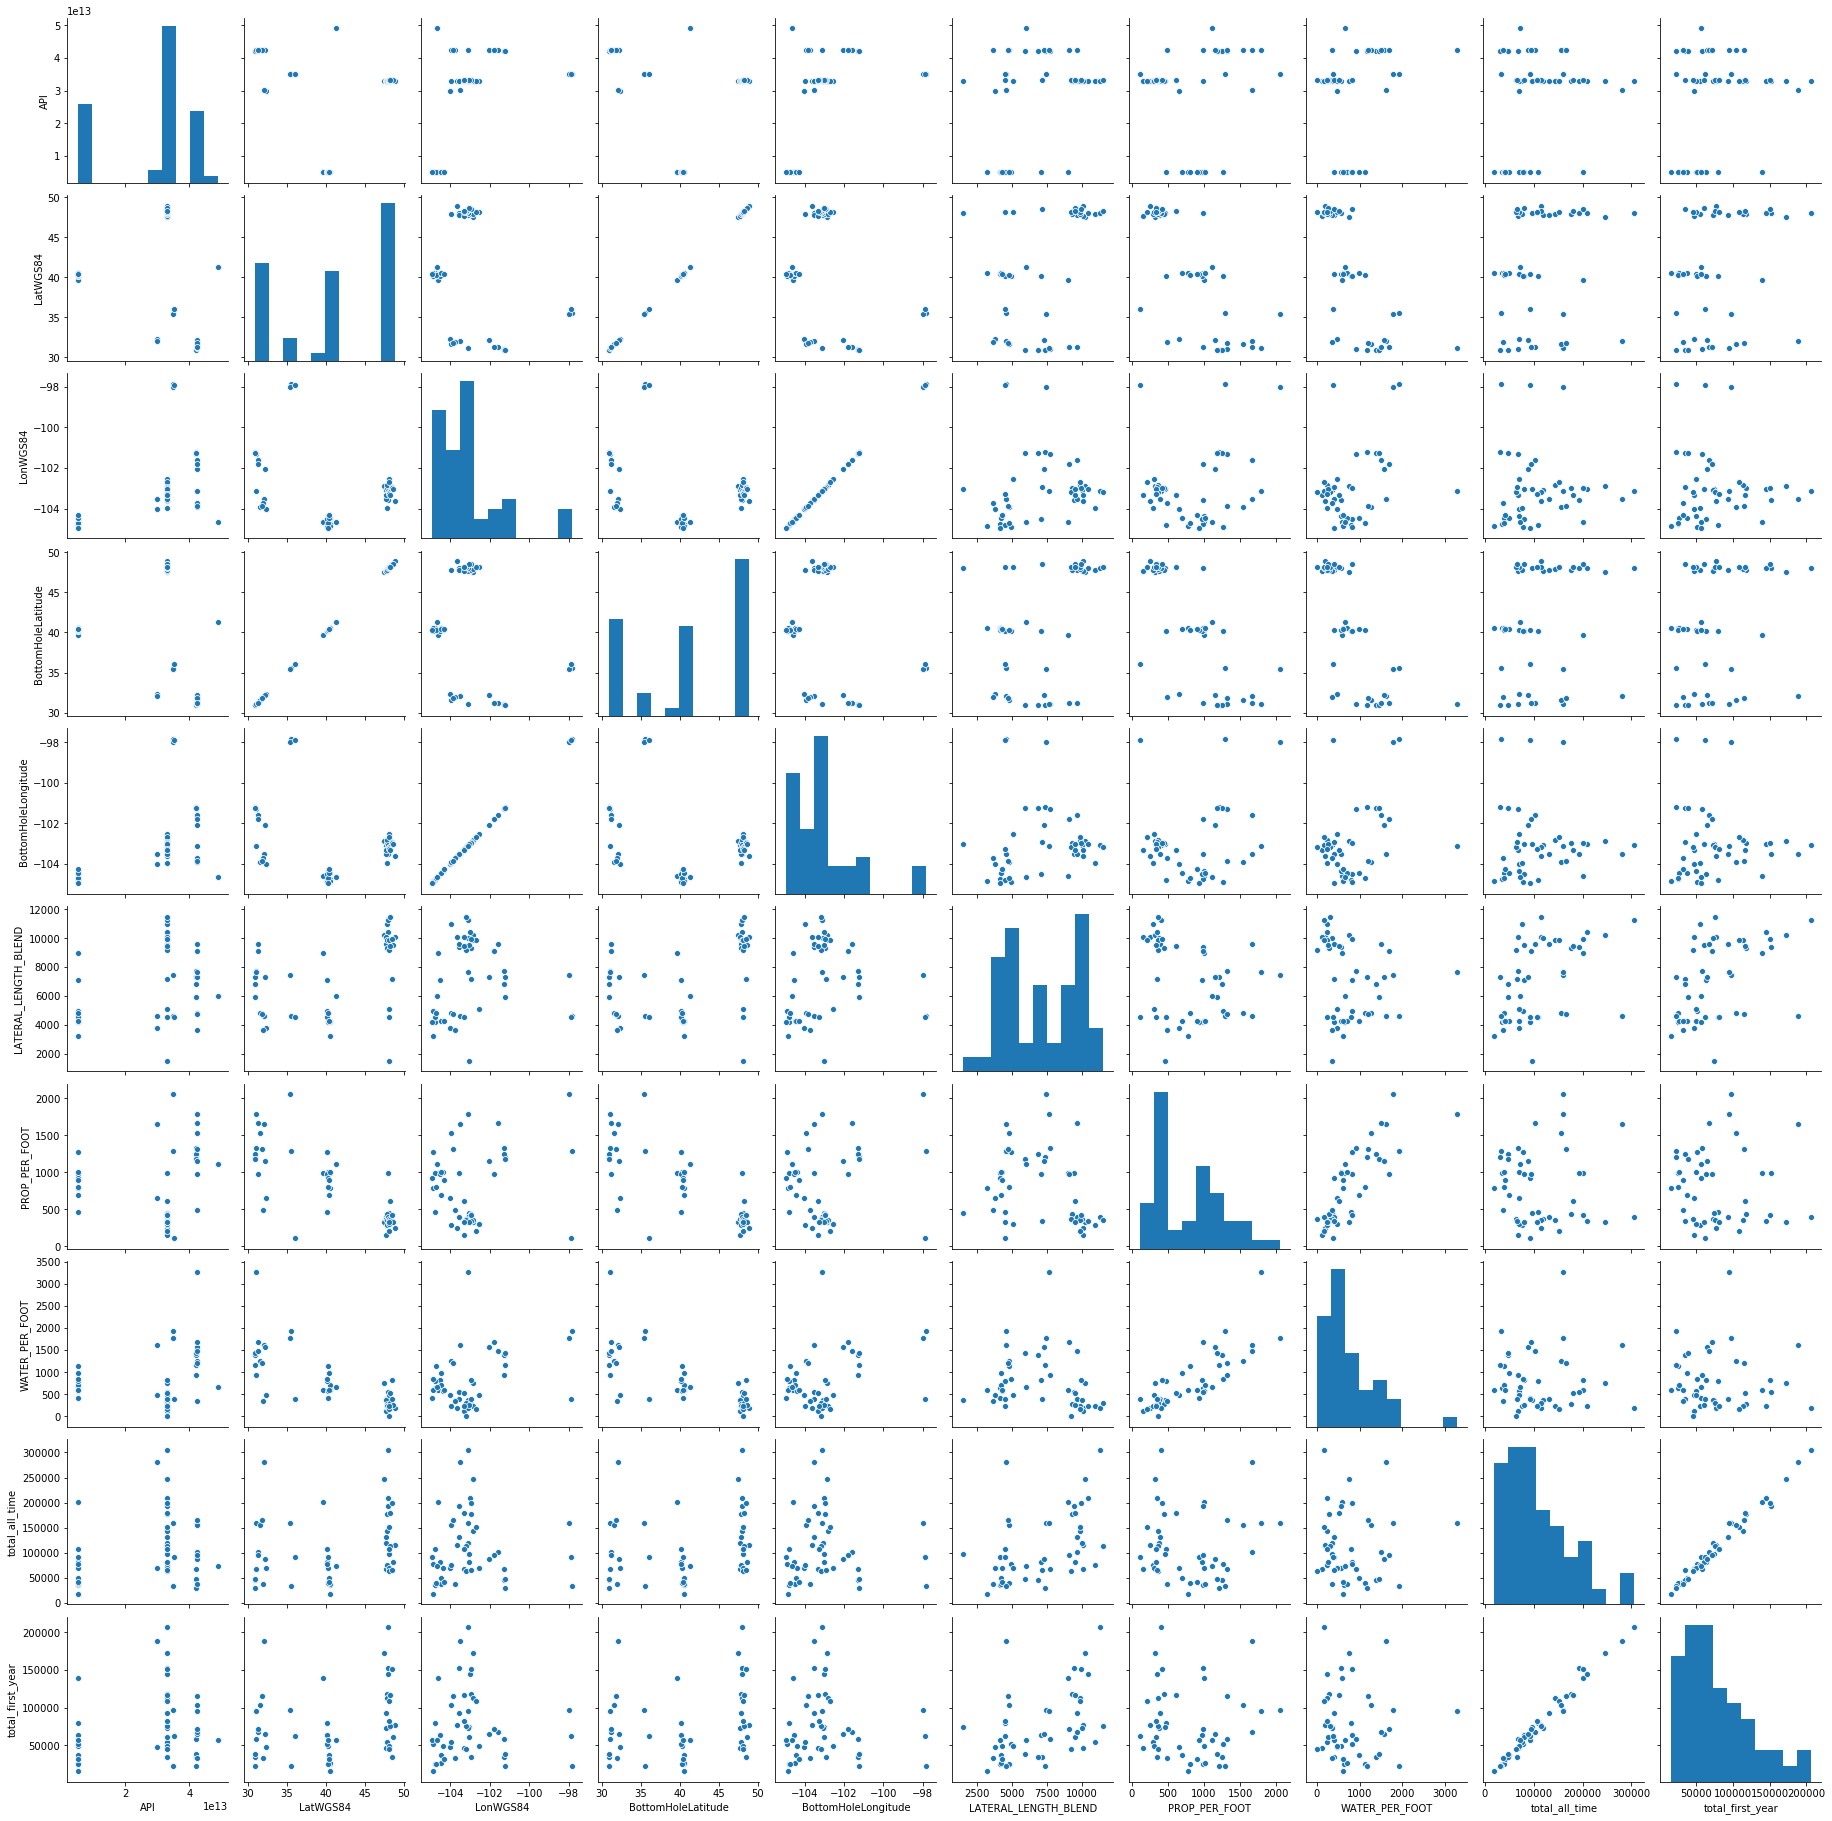

In [9]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(wells[wells.columns[:]]);

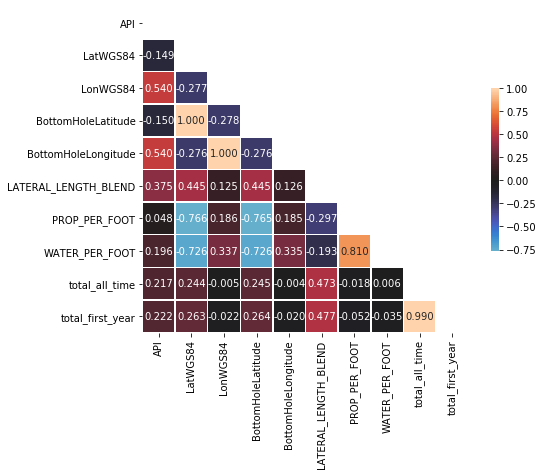

In [10]:
corrs = wells.corr()
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True    

f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corrs, mask = mask, vmax = 1, center = 0, annot = True, fmt = '.3f',
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5});

###### We see high correlations in LatWGS84 - BottomHoleLatitude, LonWGS84 - BottomHoleLogtude, LatWGS84 - PROP_PER_FOOT, LatWGS84 - WATER_PER_FOOT, BottomHoleLatitude - PROP_PER_FOOT, BottomHoleLatitude - WATER_PER_FOOT, PROP_PER_FOOT - WATER_PER_FOOT 

###### Don't pay attention to correlation total_all_time - total_first_year since they are both calcuated by other features and total_all_time includes total_first_year

In [11]:
wells.head()

API  PermitDate    SpudDate CompletionDate  \
0  5005072170100  2014-05-06  2014-05-06     2014-12-02   
1  5123377130000  2013-07-21  2013-10-06     2014-02-26   
2  5123379280000  2013-09-08  2013-09-25     2014-09-07   
3  5123379400000  2013-09-11  2014-12-05     2015-03-31   
4  5123385820100  2014-01-07  2014-01-13     2014-04-23   

       FirstProductionDate                        operatorNameIHS formation  \
0  2014-11-01 00:00:00.000         BURLINGTON RESOURCES O&G CO LP  NIOBRARA   
1  2014-02-01 00:00:00.000                SRC ENERGY INCORPORATED  NIOBRARA   
2  2013-11-01 00:00:00.000  BONANZA CREEK ENERGY OPERATING CO LLC  NIOBRARA   
3  2015-03-01 00:00:00.000              NOBLE ENERGY INCORPORATED  NIOBRARA   
4  2014-04-01 00:00:00.000    GREAT WESTERN OPERATING COMPANY LLC  NIOBRARA   

      BasinName StateName CountyName   LatWGS84    LonWGS84  \
0  DENVER BASIN  COLORADO   ARAPAHOE  39.684606 -104.642128   
1  DENVER BASIN  COLORADO       WELD  40.509320 -104.780980   
2  DENVER BASIN  COLORADO       WELD  40.335390 -104.363000   
3  DENVER BASIN  COLORADO       WELD  40.152220 -104.530780   
4  DENVER BASIN  COLORADO       WELD  40.508303 -104.868180   

   BottomHoleLatitude  BottomHoleLongitude  LATERAL_LENGTH_BLEND  \
0            39.68445           -104.60557                9005.0   
1            40.49692           -104.77859                4195.0   
2            40.34780           -104.36863                4273.0   
3            40.17445           -104.52932                7078.0   
4            40.49558           -104.86757                3211.0   

   PROP_PER_FOOT  WATER_PER_FOOT  total_all_time  total_first_year  
0       994.6866        591.8004          201325            139501  
1       991.5857        628.6321           34625             25118  
2      1000.2760        564.4841           69009             49692  
3       973.4437        824.0020           81048             63292  
4       783.5919        603.1414           18050             15569

# Tf-idf Vectorizer and PCA

In [12]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 1000)

with open(os.path.join('..', 'data', 'wells_info_train.csv')) as input_file:
    X_train = tf.fit_transform(input_file)
    
with open(os.path.join('..', 'data', 'wells_info_test.csv')) as input_file:
    X_test = tf.transform(input_file)
    
X_train.shape

Wall time: 130 ms


(35, 488)

In [13]:
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
X_train.shape

(35, 488)

In [14]:
X_test = pd.DataFrame.sparse.from_spmatrix(X_test)
X_test.shape

(15, 488)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(0.90) ## Save 90% of variance
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [16]:
# X_train.shape
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

0         1         2         3         4         5         6   \
0  0.305291 -0.313870 -0.036058  0.048697 -0.127330 -0.022679  0.045441   
1 -0.075213  0.015027 -0.443963  0.415660  0.270920 -0.088548 -0.056754   
2  0.135079  0.492738 -0.012230 -0.052923 -0.073682  0.179052 -0.159485   
3  0.208052  0.073724  0.142346 -0.033319  0.152221 -0.051034  0.110484   
4 -0.227734 -0.100700 -0.309180 -0.213558  0.302847  0.084576 -0.101441   

         7         8         9   ...        19        20        21        22  \
0  0.058209  0.157191 -0.007608  ...  0.298033 -0.095559 -0.145275 -0.034930   
1  0.035976  0.047395  0.102390  ...  0.047908 -0.190217 -0.151418  0.183209   
2  0.101859 -0.214495  0.123635  ...  0.341096  0.189490 -0.267033 -0.054019   
3 -0.277556  0.685237 -0.025585  ... -0.093544  0.107319 -0.022308  0.043431   
4 -0.046675 -0.110238  0.170404  ...  0.091435 -0.071793  0.258519 -0.109195   

         23        24        25        26        27        28  
0  0.121428  0.278065  0.084224  0.014969  0.017816 -0.039444  
1 -0.004016 -0.019968 -0.225380 -0.161557  0.096511 -0.022442  
2 -0.128482  0.043526 -0.067328  0.217302  0.101900  0.028058  
3 -0.096068  0.041441  0.011320  0.034066  0.059936  0.058343  
4 -0.141303  0.070152  0.095801  0.043028  0.052184 -0.003298  

[5 rows x 29 columns]

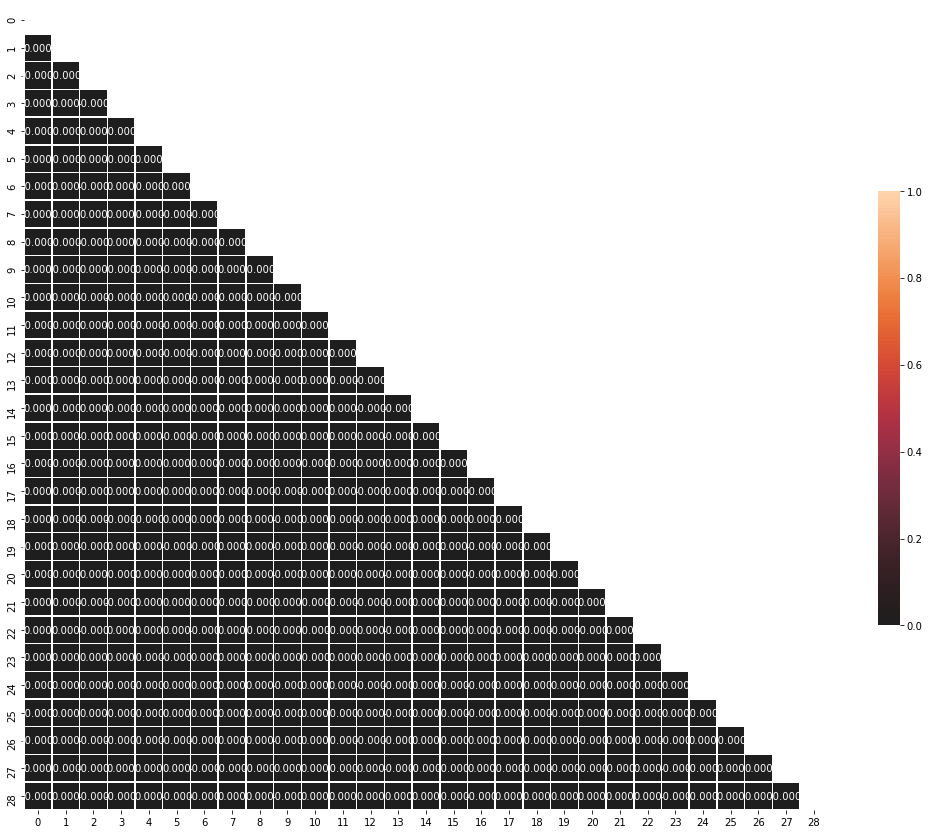

In [17]:
corrs = X_train.corr()
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True    

f, ax = plt.subplots(figsize=(18, 16))

sns.heatmap(corrs, mask = mask, vmax = 1, center = 0, annot = True, fmt = '.3f',
            square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5});

###### It is clear that after extraction there are no correlated features. Categorical data was transformed to embeddings with Tf-Idf

###### Both categorical and numerical features are scaled 

# SVM

In [43]:
from sklearn.utils import check_array

def mape(y_true, y_pred): 
    """
    Mean absolute percentage error.
    in: y_true - ground truth
        y_pred - predictions
    out: mean absolute percentage error.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
from sklearn.svm import SVR

svr = SVR()

param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [6, 7, 8, 9, 10, 11, 12, 13],
         'degree' : [1, 2, 3, 4, 5],
         'coef0' : [6, 7, 8, 9, 10, 11, 12, 13],
         'gamma' : ('auto','scale')}

svr_grid = GridSearchCV(svr, param, cv = 5, verbose = 10, n_jobs = -1)
svr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1999s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1146s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1473s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1118s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 224 t

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [6, 7, 8, 9, 10, 11, 12, 13],
                         'coef0': [6, 7, 8, 9, 10, 11, 12, 13],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [44]:
from sklearn.metrics import mean_absolute_error as mae
print(svr_grid.best_params_)
print(mae(svr_grid.predict(X_test), y_test))
print(mape(svr_grid.predict(X_test), y_test))

{'C': 12, 'coef0': 11, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
26235.428334373686
34.56616044517406


# XGBoost

In [63]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

params = {'objective':['reg:squarederror'],
              'learning_rate': [0.005, 0.01, 0.015], 
              'max_depth': [3,4,5],
              'min_child_weight': [3, 4],
              'silent': [1],
              'subsample': [0.35, 0.4, 0.45, 0.5],
              'colsample_bytree': [0.9, 0.95, 0.99],
              'n_estimators': [100, 200]}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, params, verbose = 10)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.359, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.524, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s



[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.407, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.515, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.323, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s



[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-4.144, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.435, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.538, total=   0

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.198, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.922, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.432, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.670, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-4.080, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.289, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.407, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.515, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.323, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.423, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.386, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.302, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.670, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-4.080, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.289, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.515, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.323, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.686, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.302, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.198, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.922, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.

[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.267, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.670, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-4.080, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 


[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.404, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.344, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=0.161, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  co

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.075, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.117, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.915, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.559, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.234, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.137, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[C

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=0.161, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.975, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.431, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV] 

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.847, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.219, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.056, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  col

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.858, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.613, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.312, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  c

[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.492, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.439, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.337, total=   0.0s
[CV] co

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-3.011, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.227, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.375, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  

[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.692, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.295, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.062, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[C

[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.044, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=0.095, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.078, total=   0.0s
[C

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.096, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=0.060, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.385, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.399, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.600, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.304, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.044, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=0.095, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.078, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[C

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=0.060, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.385, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.745, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.399, total=   0.2s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.600, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.304, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.078, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=0.149, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-2.299, total=   0.0s
[C

[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.385, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.745, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=0.063, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[

[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.600, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.304, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.9, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.296, total=   0

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-2.428, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.520, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.303, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.312, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.502, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.317, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsa

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.296, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.369, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.136, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.420, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.556, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.305, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsa

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.358, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.285, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.212, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.346, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.378, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.109, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsam

[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.671, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-4.142, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.420, total= 

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.297, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.212, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.931, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsam

[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.463, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.278, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.639, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.955, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.339, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.408, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 


[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.823, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.734, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.267, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.350, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=0.214, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-2.857, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.955, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.339, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.408, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 


[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.738, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.267, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.132, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.843, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.398, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.344, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 


[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.326, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.377, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.352, total=   

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.211, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.004, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.139, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV

[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.398, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.344, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.350, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.867, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=0.022, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.084, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsam

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.424, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.289, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.059, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.097, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.036, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.146, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.322, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.062, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.546, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.678, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.475, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.424, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.097, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.036, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.146, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.062, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.546, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.867, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsampl

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.678, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.475, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.424, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.231, total=   0.0s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.871, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.097, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.632, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.308, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.322, total=   0.1s
[CV] colsample_bytree=0.95, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.430, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.371, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.116, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsam

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.307, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.701, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-4.149, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=0.231, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.833, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.361, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsampl

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.641, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.5, score=-4.100, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.365, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsampl

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.317, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.753, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-4.189, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsa

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.310, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.374, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.146, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.425, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.556, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.303, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsa

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.336, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.295, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.228, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.126, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-2.911, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-1.275, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.005, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsampl

[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.241, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.203, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.979, total=   0

[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.080, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.227, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.838, total=   0.1s
[C

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.283, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.894, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.568, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.241, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.203, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.979, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.080, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.227, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.839, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.283, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.894, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.568, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.241, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.203, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-2.979, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-1.839, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.224, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.388, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.

[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.568, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=0.291, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.111, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.4 
[C

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.905, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.058, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=0.080, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.320, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.017, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.819, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.219, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.004, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-1.534, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=3, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsa

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=0.115, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.368, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.905, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.628, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.717, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=0.318, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.440, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.224, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.219, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=4, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsam

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-0.049, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=0.115, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0.4, score=-2.368, total=   0.0s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, silent=1, subsample=0

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-0.556, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.45, score=-1.628, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.5, score=-0.717, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, silent=1, subsamp

[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.440, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=0.224, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35 
[CV]  colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsample=0.35, score=-0.219, total=   0.1s
[CV] colsample_bytree=0.99, learning_rate=0.015, max_depth=5, min_child_weight=4, n_estimators=200, objective=reg:squarederror, silent=1, subsam

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.9, 0.95, 0.99],
                         'learning_rate': [0.005, 0.01, 0.015],
                         'max_depth': [3

In [67]:
print(xgb_grid.best_params_)
print(mae(xgb_grid.predict(X_test), y_test))
print(mape(xgb_grid.predict(X_test), y_test))

{'colsample_bytree': 0.95, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.45}
22460.358705357143
19801.3703125
29.820096868935313


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

params = {
    'bootstrap': [True, False],
    'max_depth': np.arange(5, 10),
    'max_features': np.arange(5, 10),
    'min_samples_leaf': np.arange(1, 4),
    'min_samples_split': np.arange(1, 5),
    'n_estimators': np.arange(10, 51, 10)
}

rf_grid = GridSearchCV(rf, params, cv = 5, verbose = 10)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estima

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
c:\users\as

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.818, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.487, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.058, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.457, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30, score=-1.654, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30, score=-1.238, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.083, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.202, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.231, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.017, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.172, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.950, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=30, score=-1.053, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.477, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.163, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.300, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.811, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.728, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.005, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.219, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.056, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.500, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.282, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.220, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.053, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.399, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.210, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.573, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.321, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.040, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.443, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.720, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.185, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.266, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.093, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.101, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.257, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.583, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.289, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.407, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.115, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.468, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.267, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.062, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.441, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.038, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.250, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.440, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.265, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.202, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.392, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.275, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.314, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.138, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.284, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.136, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.336, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-2.125, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.299, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.212, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.082, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.159, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.024, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.129, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.135, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.263, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.018, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.331, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.278, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.387, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.666, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.108, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.029, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.383, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.683, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.351, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.185, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.638, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.768, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.534, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.649, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-2.024, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.832, total=   0.0s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.242, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.606, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.866, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.273, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.164, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.183, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.779, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.211, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.591, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.424, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.641, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.332, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.347, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.340, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.065, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.239, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.302, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.300, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.368, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.716, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.446, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.673, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.124, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.300, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.417, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.537, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.034, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.237, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.037, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.318, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.724, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.440, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.171, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.267, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.462, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.095, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.194, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.064, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.018, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.323, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.104, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.892, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.308, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.027, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.142, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.274, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.181, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.372, total=   0.1s
[CV] bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.359, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.038, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.316, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.441, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.201, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.127, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_d

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.377, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.300, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.232, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.243, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.188, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.083, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.731, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.604, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.281, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.389, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.616, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.240, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.489, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.135, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.232, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.659, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.113, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.315, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.460, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.383, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.134, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.039, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.303, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.248, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.459, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.015, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.321, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.048, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.036, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.216, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-2.684, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.252, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.014, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.315, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.359, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.293, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.285, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.195, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.106, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.125, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.047, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_d

[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.263, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.454, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.147, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.326, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.682, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.247, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.228, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.282, total=   0.1s
[CV] bootstrap=True, 

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.107, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.917, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.302, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.213, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.097, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.316, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.580, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.925, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.370, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.031, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.049, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.298, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.792, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.276, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.109, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.041, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.067, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.161, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.320, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.696, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.512, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.513, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.239, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.309, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.173, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.338, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.139, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.392, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.810, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.165, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.150, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.245, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.419, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.023, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.155, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.269, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.034, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.097, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.303, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.718, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.727, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.575, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.268, total=   0.0s
[CV] bootstrap=True, max

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.587, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.040, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.061, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-2.542, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.234, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.017, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.195, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.764, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.322, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_dep

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.409, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dep

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.269, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.091, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.298, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.343, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.315, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.480, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.422, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.080, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.278, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.091, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.012, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.421, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.229, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.483, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.160, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.043, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.004, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.214, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.176, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.367, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.476, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.688, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.379, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.301, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.505, total=   0.0s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.139, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.375, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.390, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.754, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.413, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.413, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.095, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.202, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.251, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.963, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.204, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.414, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.723, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.976, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.353, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.405, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.026, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.743, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.339, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.285, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.004, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.160, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-2.092, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.159, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dep

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.957, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.495, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.264, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.418, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.319, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.133, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.251, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.291, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.477, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.203, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.242, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.275, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.971, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.277, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.236, total=   0.0s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.001, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.212, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.240, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.027, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.372, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.118, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.748, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-3.732, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.485, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.309, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.092, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.517, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.142, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.067, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.132, total=   0.2s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.708, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.196, total=   0.2s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.315, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.394, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.215, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-2.239, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.135, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.337, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.317, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.166, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.671, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.233, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.170, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.188, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.131, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.453, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.286, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.333, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.033, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.729, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.499, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dep

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.323, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.150, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.413, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.075, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.224, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.126, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.035, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.147, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.321, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dept

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.467, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.439, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.837, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.534, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.054, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.703, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.278, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.194, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.244, total=   0.2s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.421, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.483, total=   0.2s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.211, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.317, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.100, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.287, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.729, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.067, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.137, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.114, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.350, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-2.336, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.197, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.326, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.134, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.010, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.348, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.081, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-3.635, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.384, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.198, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.349, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.105, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.247, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.226, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.209, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.843, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.144, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.159, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.338, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.005, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.426, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.289, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.295, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.402, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.323, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.714, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.333, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.273, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.452, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.772, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.585, total=   0.0s
[CV] bootstrap=True, 

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.162, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.259, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.056, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.368, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.923, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.265, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.254, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.117, total=   0.2s
[CV] bootstrap=True, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.021, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dept

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.434, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-2.901, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.956, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.339, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.338, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.224, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.167, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.008, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.734, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.753, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.598, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.182, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.109, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.195, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-2.087, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.929, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.275, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.372, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.211, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.285, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.279, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.077, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.223, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.388, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.006, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.379, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.155, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-2.672, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.380, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.094, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.148, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.612, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.543, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.048, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.718, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.625, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.964, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.235, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.030, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.358, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.347, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.099, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.434, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.400, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.154, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.511, total=   0.0s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.388, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.179, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.349, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.249, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.410, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.321, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.403, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.141, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.148, total=   0.1s
[CV] bootstrap=True, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.292, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.231, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.174, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.125, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.893, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.385, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.129, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.034, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.369, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.082, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.311, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.093, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.492, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.225, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.500, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.335, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.047, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.567, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-2.010, total=   0.1s
[CV] bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.144, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.064, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.495, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.545, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.457, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.257, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.295, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.686, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.415, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.365, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.226, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.268, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.497, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.004, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.423, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.276, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.680, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.463, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.281, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.174, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.309, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.296, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.594, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.012, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.247, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, ma

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.283, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.206, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.287, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.237, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.018, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.318, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.271, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.171, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.394, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.062, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.637, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.055, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.391, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.246, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.055, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.837, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, 

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.185, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_dept

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.073, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.059, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.200, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.474, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.937, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.829, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.121, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.053, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.832, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.756, total=   0.2s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.469, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.036, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.445, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.056, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.520, total=   0.1s
[CV] bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.274, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.121, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.395, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.344, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.470, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.448, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.933, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.294, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.221, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.219, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.011, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.326, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.429, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.379, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.035, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-2.927, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.447, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.487, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.236, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.029, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.504, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.320, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.752, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.184, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.360, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.672, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_d

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.613, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-2.371, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.129, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.290, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.471, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.315, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.659, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.235, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-1.357, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=-0.305, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=0.004, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=-0.290, total=   0.0s
[CV] bootstrap=True,

[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-0.339, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.202, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-0.114, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-1.751, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.903, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.900, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.939, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.457, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.166, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.022, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-2.205, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-1.171, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.179, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.144, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-1.594, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-1.254, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.165, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.539, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-2.141, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.171, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-1.058, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-1.201, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.542, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.369, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.826, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.304, total=   0.1s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.352, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.262, total=   0.0s
[CV] bootstrap=True, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.280, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.252, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.165, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.432, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.234, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.093, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.163, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.884, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.251, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.439, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.513, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.770, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.066, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.067, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.391, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.130, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.259, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.467, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.022, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.355, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.134, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.344, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.349, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.415, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.088, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.500, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.850, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.035, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.400, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.572, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.146, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.127, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-1.416, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-1.353, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30, score=-0.394, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.093, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.052, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.976, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.305, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.079, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-1.630, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-1.205, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=30, score=-0.336, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.418, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.735, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.062, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-0.359, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.170, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.159, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.290, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.926, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.035, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.516, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.318, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.343, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.161, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.571, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.412, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.122, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.201, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.029, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.556, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, 

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.332, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.194, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-1.698, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-1.021, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.194, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=0.067, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.652, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.452, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.144, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.258, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.066, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.058, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.466, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.295, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.112, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.040, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.338, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.387, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.548, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.893, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.692, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.246, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.177, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.873, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.330, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.237, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.187, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.215, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.552, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.511, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.834, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.382, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.136, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.228, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.556, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.223, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.100, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.142, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.100, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.103, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.045, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.133, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.105, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.511, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.229, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.022, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.109, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.221, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.278, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_d

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.847, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.132, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.181, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.061, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.325, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.298, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.476, total=   0.1s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.323, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=True, max_depth=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.080, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.134, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.319, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-2.228, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.376, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.469, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.234, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.375, total=   0.0s
[CV] bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.092, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False,

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.108, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.046, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.410, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.378, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.018, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.099, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.607, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.344, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootst

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.267, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.292, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.131, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.727, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.557, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.394, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fa

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.207, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.043, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.123, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.897, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.212, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.490, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.119, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.172, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.098, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.429, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.263, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.054, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.100, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.555, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-2.647, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.075, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.313, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.550, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.238, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.472, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.158, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.313, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.226, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=-0.302, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, ma

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.394, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.090, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.404, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.484, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.247, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.105, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.255, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.180, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.518, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.775, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.942, total=   0.0s
[CV] bootstra

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.159, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.259, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.448, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.380, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootst

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.109, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.040, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.194, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.238, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.238, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.960, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.086, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.419, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.238, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.376, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.089, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.047, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.363, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.100, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.469, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-2.342, total=   0.0s
[CV] bootstr

[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.155, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=0.185, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-2.499, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.192, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.035, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.317, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-2.603, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-1.284, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.569, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.006, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-2.076, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-1.536, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.388, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.019, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.450, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.400, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.490, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.279, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.020, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.261, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.027, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.270, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-2.488, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-1.232, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.884, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.032, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-0.405, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.181, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.221, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.465, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.214, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.181, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.038, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-2.748, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.453, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.399, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.307, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.133, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.215, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=F

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.026, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.383, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.015, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.515, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootst

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.199, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.153, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.558, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.349, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.140, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=F

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.801, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.372, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.242, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.153, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.385, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.181, total=   0.0s
[CV] bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.183, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.363, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.715, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fa

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.150, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.775, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.334, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.306, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.216, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.127, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.083, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.092, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=0.303, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=0.273, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=-2.376, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=-0.927, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.228, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.221, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.113, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.905, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.351, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.129, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.256, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.946, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.220, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.472, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.183, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.047, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.858, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.716, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.247, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.138, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.358, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, ma

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.512, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.462, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.487, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-2.205, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.190, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.214, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.364, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.231, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.027, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.782, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.433, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.276, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.075, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.175, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.571, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.026, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.219, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.147, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.361, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.017, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.301, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.090, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.434, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.124, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.003, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.134, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.231, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.480, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.134, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-2.547, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.365, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.057, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.289, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-2.269, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.062, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.594, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.493, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.209, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.737, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.286, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.006, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.442, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.173, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.004, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.353, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.357, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.309, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=F

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.108, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.062, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.770, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.235, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.477, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.142, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.143, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.569, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)



[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.775, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.138, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-3.460, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.451, total=   0.0s
[CV] bootstr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.394, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.164, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.219, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.903, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.372, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.096, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.856, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.457, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.626, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.201, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.185, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.655, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.919, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.491, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.028, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.070, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.536, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.425, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.252, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.882, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.128, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.370, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.147, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.310, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.145, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.345, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.699, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.964, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.396, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.197, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.433, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.243, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.116, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.367, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.129, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.388, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.891, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.282, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.398, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.031, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.133, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-2.679, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.566, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.016, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-2.443, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.312, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.347, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.662, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.327, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.323, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.023, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.292, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.056, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.191, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.269, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.385, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.372, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.366, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.322, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.944, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.418, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.001, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-2.062, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.511, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.497, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.044, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.058, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.724, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.406, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.034, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.129, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.084, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.308, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.176, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=0.439, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.288, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-2.408, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.442, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.247, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.036, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-2.181, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.235, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.199, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.096, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.165, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.881, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.119, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.323, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.443, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fa

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.339, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.021, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.374, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.240, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.061, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.442, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.220, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.336, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.292, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.172, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.292, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.138, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.022, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.323, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.220, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.420, total=   0.0s
[CV] bootstrap=False,

[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.241, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.587, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.223, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.268, total=   0.0s
[CV] bootstr

[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.262, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.085, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.711, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.204, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.098, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.088, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.892, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.504, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.114, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-2.032, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.106, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.444, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.123, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.074, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.006, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.072, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.014, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.250, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.467, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.127, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.960, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.244, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.424, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.191, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.888, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.151, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.229, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.826, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.227, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.559, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.150, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.206, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.068, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-2.566, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.630, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.472, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=0.027, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=30, score=-1.087, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.369, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.048, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=0.502, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.447, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.593, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.126, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=F

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.210, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.318, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.413, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.009, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootst

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.497, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.621, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.550, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.227, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-2.320, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.363, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-2.011, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.046, total=   0.0s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.532, total=   0.1s
[CV] bootstrap=False, max_depth=7, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=0.285, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-2.413, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10, score=-1.362, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.597, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30, score=-2.337, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=30, score=-1.519, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.311, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-0.195, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=4, n_estimators=40 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-2.467, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-1.433, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30, score=-0.382, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30, score=0.061, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.044, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=-2.748, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=-1.095, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=-0.306, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.623, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.355, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=0.060, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=F

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.989, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.330, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.447, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.359, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.276, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.601, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.191, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.484, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.308, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.214, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.009, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.501, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.017, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.177, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.620, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.132, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=-3.183, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=10, score=-1.500, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.478, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-0.034, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootst

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=30, score=-1.528, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-0.417, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.043, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=0.213, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=40 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.406, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.141, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.119, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-2.175, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=0.395, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.102, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-2.164, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.033, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.215, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.269, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fals

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.465, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.394, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.055, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.438, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.005, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.986, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.440, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=20, score=-1.425, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.530, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.207, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.076, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.075, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.214, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.144, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.308, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.909, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-2.192, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-1.004, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.586, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootst

[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.116, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.685, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.381, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.146, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.524, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.713, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.075, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.745, total=   0.0s
[CV] bootst

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.202, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.086, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.207, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.188, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.219, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.032, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.356, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.797, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.389, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.148, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.003, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.246, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.182, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.901, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.328, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.316, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.220, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.115, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.771, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-1.065, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.416, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.169, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.111, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.132, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-3.437, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.944, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.253, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.012, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.065, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-2.484, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-1.210, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.542, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.124, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.059, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.289, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.323, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.204, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-1.097, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-1.195, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=-0.534, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.356, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.067, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.185, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-2.594, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-1.068, total=   0.0s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=-0.412, total=   0.1s
[CV] bootstrap=False, max_depth=8, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-1.658, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.418, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.094, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=-0.139, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootst

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.323, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.194, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.125, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-2.403, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.858, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.131, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.056, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.076, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=40, score=-1.017, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.422, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.081, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.137, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.876, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.084, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.389, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-2.376, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-2.189, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-1.419, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=-0.369, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40, score=0.405, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=5, min_samples_leaf=3, min_samples_split=4, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.792, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.530, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fal

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-0.281, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-2.471, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.579, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.232, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootst

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.269, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.108, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.067, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.664, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.512, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.109, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.116, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.705, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.004, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.741, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.265, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.459, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.980, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.532, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.202, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.295, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.042, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-2.162, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-1.106, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40, score=-0.310, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.283, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.017, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.563, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.131, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=20, score=-1.608, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.417, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.065, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.265, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=40, score=-1.057, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.203, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.141, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.145, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.143, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.448, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.425, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.375, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.334, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=0.119, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-0.106, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.739, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-0.357, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.019, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.162, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=-2.023, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=-2.225, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=-1.348, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.642, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=-0.166, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootst

[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=20, score=-1.237, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.409, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=0.497, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30, score=-0.382, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=7, min_samples_leaf=3, min_samples_split=4, n_estimators=30 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.320, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.507, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=Fa

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-0.114, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=0.298, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.742, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.082, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.424, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.042, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-0.154, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.126, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootst

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.346, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-4.506, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-1.253, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.448, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.025, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.025, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.829, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-1.365, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstra

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10, score=-0.440, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-2.980, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-1.205, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.339, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.281, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.126, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.120, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.237, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.980, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=40, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.506, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-0.574, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.034, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=-2.280, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-2.454, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=30, score=-1.228, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=-0.578, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40, score=0.197, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=40 
[CV]  bootstr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-2.609, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=-1.140, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=10 
[CV]  bootstrap=Fa

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=30 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr


[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-2.992, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=-0.885, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=-0.464, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=20, score=0.347, total=   0.0s
[CV] bootstr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-2.254, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=30, score=-1.192, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=-0.518, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40, score=0.226, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=40 
[CV]  bootstr

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=20 
[CV]  bootstrap=False, m

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50, score=nan, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=1, n_estimators=50 
[CV]  bootstrap=False, m

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=-0.867, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=-0.299, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.162, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30, score=0.147, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=3, n_estimators=30 
[CV]  bootstra

[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-0.310, total=   0.0s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-2.465, total=   0.1s
[CV] bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=9, max_features=9, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=-1.068, total=   0.0s


[Parallel(n_jobs=1)]: Done 15000 out of 15000 | elapsed: 11.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [73]:
print(rf_grid.best_params_)
print(mae(rf_grid.predict(X_test), y_test))
print(mape(rf_grid.predict(X_test), y_test))

{'bootstrap': True, 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
20831.672888888887
34.453079054288864
